In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [4]:
data = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQrnERieLVytTrRaIBRwJN8DcR6FYRfj3x1M94U1pb7AIplgKE29qUlMwh2xiQ3TJYghXjhtm2Zp0G2/pub?output=csv')
data.head()


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       501 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [6]:
# Check for missing values
missing_values = data.isnull().sum()

# Display the missing values
print(missing_values)

crim       0
zn         0
indus      0
chas       0
nox        0
rm         5
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64


In [7]:
# Menghapus baris yang memiliki nilai null
data1 = data.dropna()

# Mengecek ulang nilai null setelah penghapusan
missing_values_after = data1.isnull().sum()
print("\nMissing values after dropping nulls:")
print(missing_values_after)


Missing values after dropping nulls:
crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64


In [8]:
# Check for duplicate rows
duplicates = data1.duplicated()

# Print the number of duplicate rows
num_duplicates = duplicates.sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 0


In [9]:
# Get descriptive statistics
description = data1.describe()

# Display the descriptive statistics
description

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000
mean,3.647414,11.402196,11.160619,0.069860,0.555151,6.284341,68.513373,3.786423,9.596806,409.143713,18.453493,356.298523,12.643752,22.561277
std,8.637688,23.414214,6.857123,0.255166,0.116186,0.705587,28.212221,2.103327,8.735509,169.021216,2.166327,91.672055,7.162746,9.232435
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081990,0.000000,5.190000,0.000000,0.449000,5.884000,45.000000,2.088200,4.000000,279.000000,17.400000,375.210000,6.920000,17.000000
50%,0.261690,0.000000,9.690000,0.000000,0.538000,6.208000,77.700000,3.182700,5.000000,330.000000,19.000000,391.340000,11.380000,21.200000
75%,3.693110,12.500000,18.100000,0.000000,0.624000,6.625000,94.000000,5.118000,24.000000,666.000000,20.200000,396.230000,16.940000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


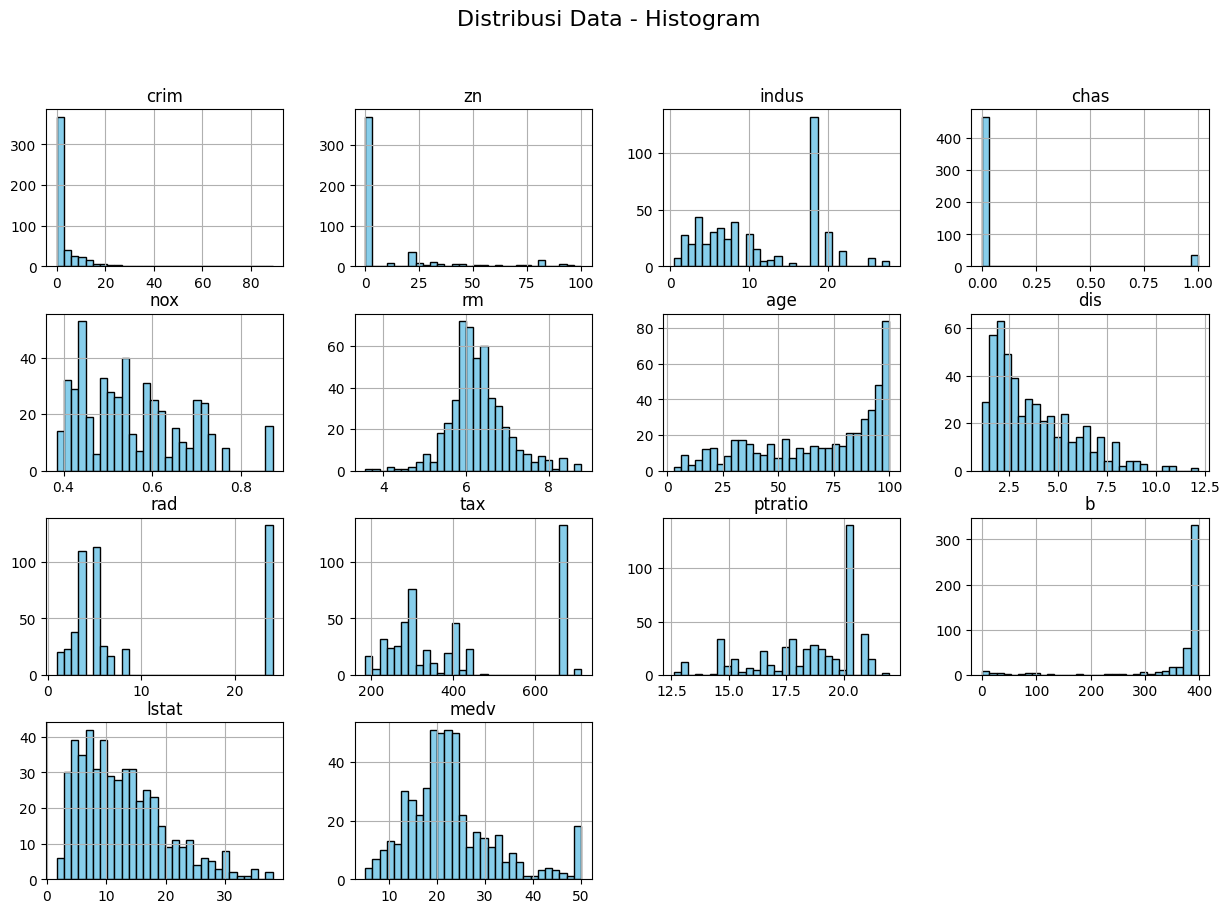

In [10]:
# Visualisasi histogram untuk semua kolom numerik
data1.hist(bins=30, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle('Distribusi Data - Histogram', fontsize=16)
plt.show()


In [11]:
# Import library
from sklearn.model_selection import train_test_split

# Memisahkan fitur dan target
feature = data1.drop(columns='medv')
target = data1['medv']

In [12]:
# Membagi data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.2, random_state=42)
print(f"Training set: {X_train.shape}, Test set: {X_test.shape}")


Training set: (400, 13), Test set: (101, 13)


In [13]:
# calculate VIF scores
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant

X = add_constant(X_train)

vif_df = pd.DataFrame([vif(X.values, i)
               for i in range(X.shape[1])],
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

,feature,vif_score
1,crim,1.929411
2,zn,2.319803
3,indus,3.769276
4,chas,1.066331
5,nox,4.417378
6,rm,1.957315
7,age,3.198359
8,dis,3.917637
9,rad,8.379470
10,tax,9.860942


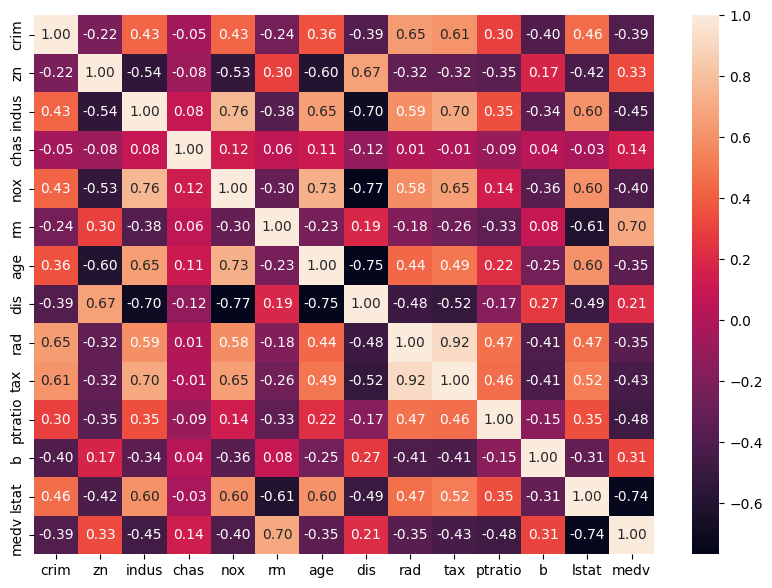

In [14]:
# heatmap correlation
X_train1 = pd.concat([X_train, y_train], axis=1)
corr = X_train1.corr()

plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

In [15]:
X_train2 = X_train.drop(columns=['rad'])
X_test2 = X_test.drop(columns=['rad'])

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant

X = add_constant(X_train2)

vif_df = pd.DataFrame([vif(X.values, i)
               for i in range(X.shape[1])],
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

,feature,vif_score
1,crim,1.792966
2,zn,2.286984
3,indus,3.561141
4,chas,1.058964
5,nox,4.398423
6,rm,1.887141
7,age,3.177568
8,dis,3.913533
9,tax,3.354524
10,ptratio,1.750212


MOdel

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [18]:
# Fungsi untuk menghitung MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


# List untuk menyimpan hasil evaluasi
results1 = []
results2 = []

In [19]:
# Baseline Model: Linear Regression
print("\nBaseline Model: Linear Regression")
baseline_model = LinearRegression()
baseline_model.fit(X_train2, y_train)

# Evaluasi
y_pred_lr1= baseline_model.predict(X_train2)
results1.append({
    'Model': 'Linear Regression',
    'RMSE': np.sqrt(mean_squared_error(y_train, y_pred_lr1)),
    'MAE': mean_absolute_error(y_train, y_pred_lr1),
    'MAPE': mean_absolute_percentage_error(y_train, y_pred_lr1),
    'R²': r2_score(y_train, y_pred_lr1)
})

# Evaluasi
y_pred_lr = baseline_model.predict(X_test2)
results2.append({
    'Model': 'Linear Regression',
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_lr)),
    'MAE': mean_absolute_error(y_test, y_pred_lr),
    'MAPE': mean_absolute_percentage_error(y_test, y_pred_lr),
    'R²': r2_score(y_test, y_pred_lr)
})


Baseline Model: Linear Regression


In [20]:
# Ridge Regression dengan hyperparameter tuning
print("\nModel: Ridge Regression")
ridge_model = Ridge()
ridge_params = {'alpha': [0.1, 1.0, 10.0, 20.0]}
ridge_grid = GridSearchCV(ridge_model, ridge_params, cv=10, scoring='neg_mean_squared_error')
ridge_grid.fit(X_train2, y_train)

print("Best parameters for Ridge:", ridge_grid.best_params_)

# Evaluasi
y_pred_ridge1 = ridge_grid.best_estimator_.predict(X_train2)
results1.append({
    'Model': 'Ridge Regression',
    'RMSE': np.sqrt(mean_squared_error(y_train, y_pred_ridge1)),
    'MAE': mean_absolute_error(y_train, y_pred_ridge1),
    'MAPE': mean_absolute_percentage_error(y_train, y_pred_ridge1),
    'R²': r2_score(y_train, y_pred_ridge1)
})

y_pred_ridge = ridge_grid.best_estimator_.predict(X_test2)
results2.append({
    'Model': 'Ridge Regression',
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_ridge)),
    'MAE': mean_absolute_error(y_test, y_pred_ridge),
    'MAPE': mean_absolute_percentage_error(y_test, y_pred_ridge),
    'R²': r2_score(y_test, y_pred_ridge)
})


Model: Ridge Regression
Best parameters for Ridge: {'alpha': 0.1}


In [21]:
# Lasso Regression dengan hyperparameter tuning
print("\nModel: Lasso Regression")
lasso_model = Lasso()
lasso_params = {'alpha': [0.01, 0.1, 1.0, 10.0]}
lasso_grid = GridSearchCV(lasso_model, lasso_params, cv=10, scoring='neg_mean_squared_error')
lasso_grid.fit(X_train2, y_train)

print("Best parameters for Lasso:", lasso_grid.best_params_)

# Evaluasi
y_pred_lasso1 = lasso_grid.best_estimator_.predict(X_train2)

results1.append({
    'Model': 'Lasso Regression',
    'RMSE': np.sqrt(mean_squared_error(y_train, y_pred_lasso1)),
    'MAE': mean_absolute_error(y_train, y_pred_lasso1),
    'MAPE': mean_absolute_percentage_error(y_train, y_pred_lasso1),
    'R²': r2_score(y_train, y_pred_lasso1)
})


y_pred_lasso = lasso_grid.best_estimator_.predict(X_test2)
results2.append({
    'Model': 'Lasso Regression',
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_lasso)),
    'MAE': mean_absolute_error(y_test, y_pred_lasso),
    'MAPE': mean_absolute_percentage_error(y_test, y_pred_lasso),
    'R²': r2_score(y_test, y_pred_lasso)
})


Model: Lasso Regression
Best parameters for Lasso: {'alpha': 0.01}


In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Inisialisasi Random Forest dengan lebih banyak regularisasi
print("\nModel: Random Forest")
rf_model = RandomForestRegressor(
    random_state=42,
    max_samples=0.7,  # Gunakan hanya 70% data untuk tiap pohon
    bootstrap=True  # Ambil subset data untuk tiap pohon
)

# Hyperparameter tuning dengan lebih ketat
rf_params = {
    'n_estimators': [50, 100],  # Kurangi jumlah pohon
    'max_depth': [3, 5, 7],  # Batasi kedalaman lebih ketat
    'min_samples_split': [20, 30, 40],  # Batasi pemecahan node
    'min_samples_leaf': [10, 15, 20],  # Batasi leaf minimum
    'max_features': ['log2'],  # Gunakan subset fitur lebih kecil
}

# Grid Search dengan CV lebih besar
rf_grid = GridSearchCV(rf_model, rf_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
rf_grid.fit(X_train2, y_train)

# Parameter terbaik
print("Best parameters for Random Forest:", rf_grid.best_params_)

# Evaluasi di training set
y_pred_rf1 = rf_grid.best_estimator_.predict(X_train2)
results1.append({
    'Model': 'Random Forest',
    'RMSE': np.sqrt(mean_squared_error(y_train, y_pred_rf1)),
    'MAE': mean_absolute_error(y_train, y_pred_rf1),
    'MAPE': mean_absolute_percentage_error(y_train, y_pred_rf1),
    'R²': r2_score(y_train, y_pred_rf1)
})

# Evaluasi di test set
y_pred_rf = rf_grid.best_estimator_.predict(X_test2)
results2.append({
    'Model': 'Random Forest',
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_rf)),
    'MAE': mean_absolute_error(y_test, y_pred_rf),
    'MAPE': mean_absolute_percentage_error(y_test, y_pred_rf),
    'R²': r2_score(y_test, y_pred_rf)
})




Model: Random Forest
Best parameters for Random Forest: {'max_depth': 7, 'max_features': 'log2', 'min_samples_leaf': 10, 'min_samples_split': 20, 'n_estimators': 100}


In [23]:
# Ringkasan Hasil
import pandas as pd
results_df1 = pd.DataFrame(results1)
print("\nRingkasan Hasil:")
print(results_df1)


Ringkasan Hasil:
               Model      RMSE       MAE       MAPE        R²
0  Linear Regression  4.856067  3.359373  16.419719  0.729908
1   Ridge Regression  4.856396  3.356638  16.418001  0.729871
2   Lasso Regression  4.859839  3.354111  16.429069  0.729488
3      Random Forest  4.012350  2.544481   0.123114  0.815609


In [24]:
# Ringkasan Hasil
import pandas as pd
results_df2 = pd.DataFrame(results2)
print("\nRingkasan Hasil:")
print(results_df2)


Ringkasan Hasil:
               Model      RMSE       MAE       MAPE        R²
0  Linear Regression  4.732674  3.408373  20.026574  0.696879
1   Ridge Regression  4.742602  3.408815  20.024466  0.695606
2   Lasso Regression  4.773205  3.414265  20.039595  0.691665
3      Random Forest  3.678296  2.760107   0.177440  0.816897



Feature Importances:
    Feature  Importance
5        rm    0.332994
11    lstat    0.270759
2     indus    0.072912
0      crim    0.072636
9   ptratio    0.072526
4       nox    0.059266
8       tax    0.038545
7       dis    0.033088
6       age    0.022234
10        b    0.013756
1        zn    0.010915
3      chas    0.000367


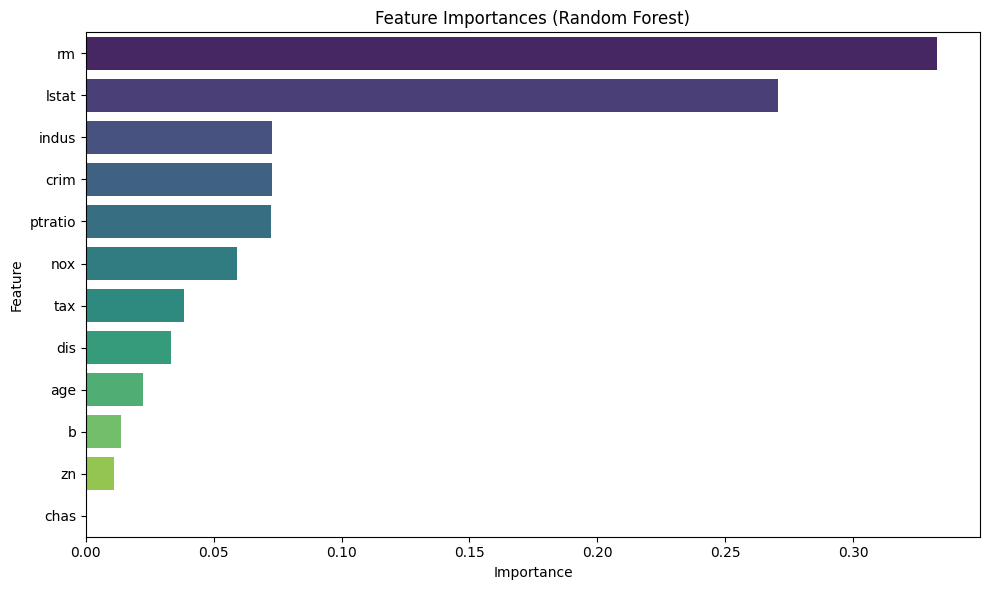

In [25]:
# Mengekstrak feature importance
feature_importances = rf_grid.best_estimator_.feature_importances_

# Membuat DataFrame untuk feature importance
importance_df = pd.DataFrame({
    'Feature': X_train2.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Menampilkan feature importance
print("\nFeature Importances:")
print(importance_df)

# Visualisasi feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importances (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()
